In [31]:
import pandas as pd

In [32]:
user_behaviour = pd.read_csv('../data/processed/user_behaviour.csv')
user_behaviour.head()

,profile_id,event,time,portfolio_id,amount,transcript_reward,reward,channels,difficulty,duration,offer_type,gender,age,income,become_member_on_date
0,78afa995795e4d85b5d9ceeca43f5fef,offer_received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,5.0,web,5.0,7.0,bogo,F,75,100000.0,2017-05-09
1,78afa995795e4d85b5d9ceeca43f5fef,offer_received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,5.0,email,5.0,7.0,bogo,F,75,100000.0,2017-05-09
2,78afa995795e4d85b5d9ceeca43f5fef,offer_received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,5.0,mobile,5.0,7.0,bogo,F,75,100000.0,2017-05-09
3,a03223e636434f42ac4c3df47e8bac43,offer_received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,5.0,web,20.0,10.0,discount,NaN,118,NaN,2017-08-04
4,a03223e636434f42ac4c3df47e8bac43,offer_received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,5.0,email,20.0,10.0,discount,NaN,118,NaN,2017-08-04


In [33]:
customer_type = pd.read_csv('../data/processed/profile_with_customer_type.csv').groupby(['profile_id','customer_type']).size().reset_index(name='count')
customer_type.head()

,profile_id,customer_type,count
0,0009655768c64bdeb2e877511632db8f,1,1
1,00116118485d4dfda04fdbaba9a87b5c,2,1
2,0011e0d4e6b944f998e987f904e8c1e5,3,1
3,0020c2b971eb4e9188eac86d93036a77,0,1
4,0020ccbbb6d84e358d3414a3ff76cffd,0,1


In [34]:
analysis = pd.merge(user_behaviour[["profile_id","portfolio_id","event","offer_type"]], customer_type[["profile_id","customer_type"]], on='profile_id', how='left')
analysis.head()

,profile_id,portfolio_id,event,offer_type,customer_type
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_received,bogo,0
1,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_received,bogo,0
2,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_received,bogo,0
3,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_received,discount,2
4,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_received,discount,2


In [35]:
analysis["customer_type"] = "customer_type_" + analysis["customer_type"].astype('string')
analysis.head()

,profile_id,portfolio_id,event,offer_type,customer_type
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_received,bogo,customer_type_0
1,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_received,bogo,customer_type_0
2,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_received,bogo,customer_type_0
3,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_received,discount,customer_type_2
4,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_received,discount,customer_type_2


Distribution of Customer Types:

Absolute numbers and percentages:
                  Count  Percentage
customer_type                      
customer_type_0  227131       36.41
customer_type_1  167895       26.91
customer_type_4  145548       23.33
customer_type_2   75396       12.09
customer_type_3    7870        1.26


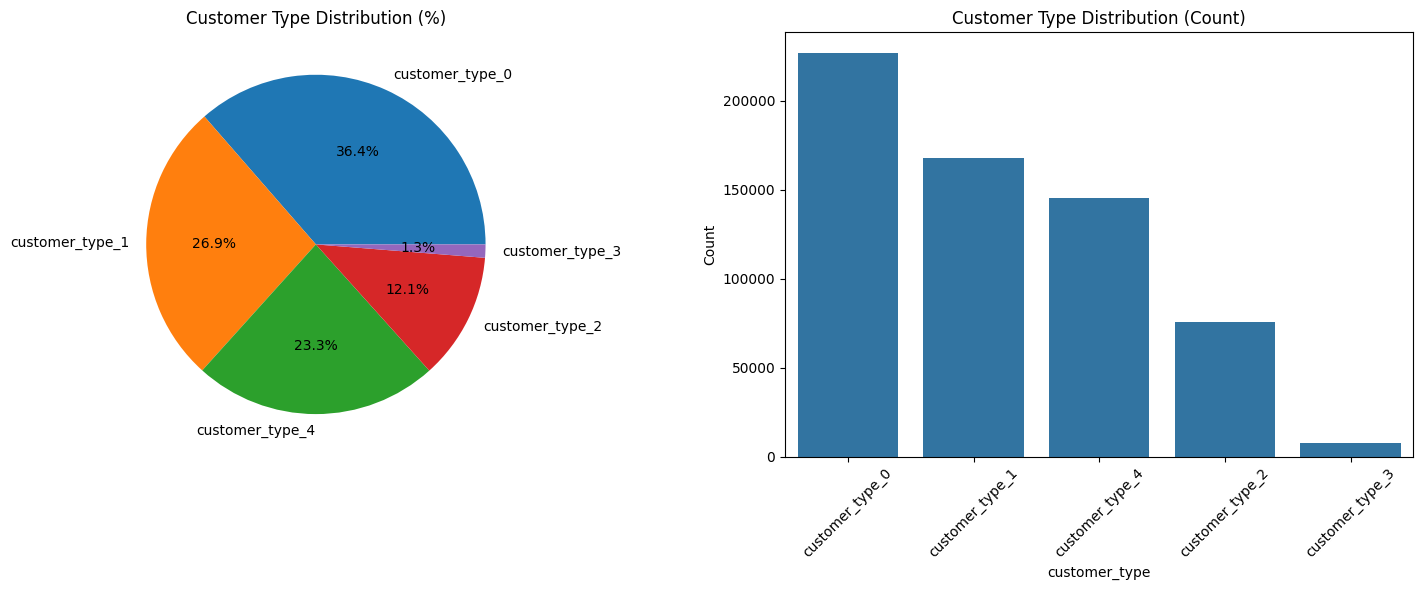

In [36]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate value counts and percentages
customer_dist = analysis['customer_type'].value_counts()
customer_pct = analysis['customer_type'].value_counts(normalize=True) * 100

# Create a DataFrame with both counts and percentages
distribution = pd.DataFrame({
    'Count': customer_dist,
    'Percentage': customer_pct
}).round(2)

# Display the results
print("Distribution of Customer Types:")
print("\nAbsolute numbers and percentages:")
print(distribution)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot pie chart
ax1.pie(distribution['Percentage'], labels=distribution.index, autopct='%1.1f%%')
ax1.set_title('Customer Type Distribution (%)')

# Plot bar chart
sns.barplot(x=distribution.index, y='Count', data=distribution, ax=ax2)
ax2.set_title('Customer Type Distribution (Count)')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

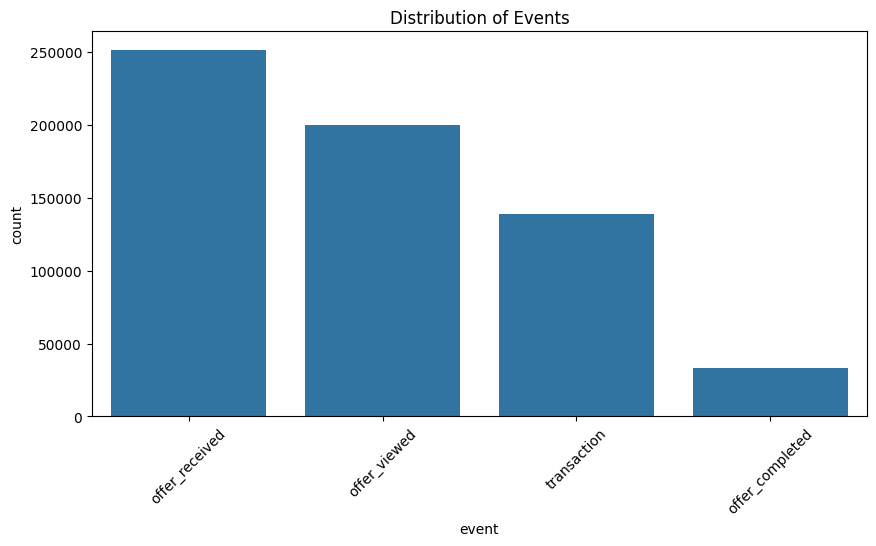

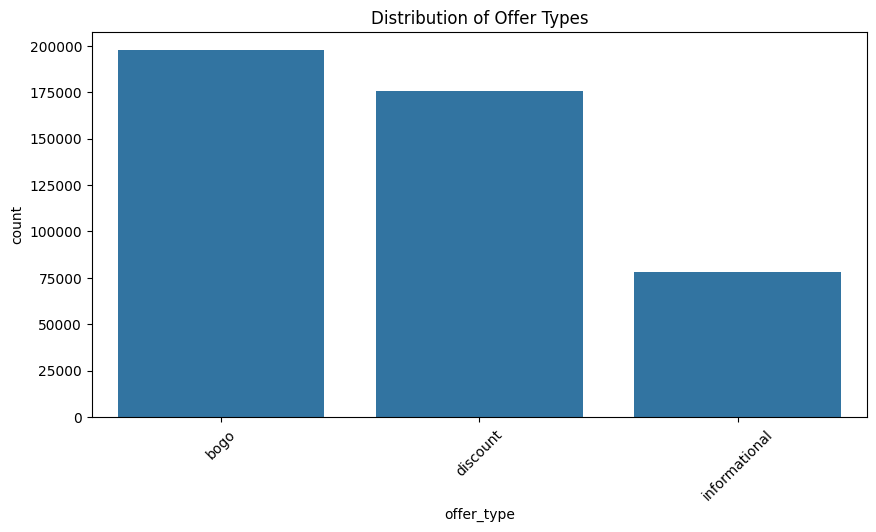

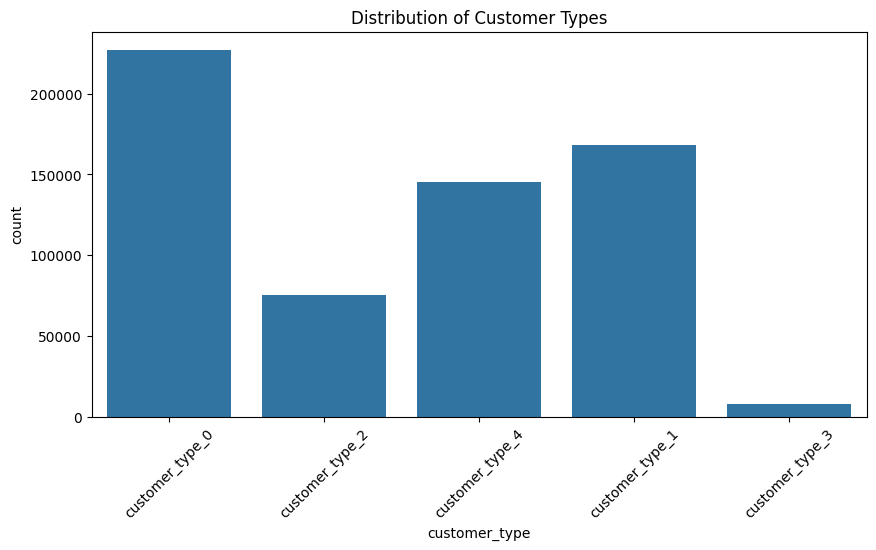

<Figure size 1200x600 with 0 Axes>

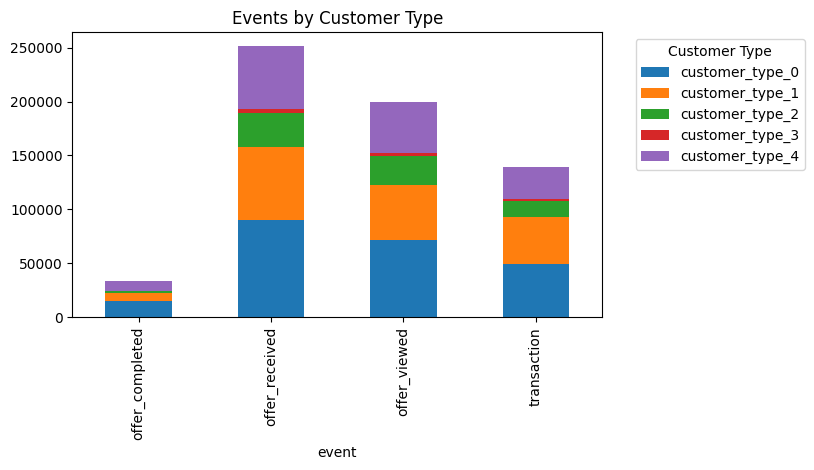


Basic Statistics:
Total number of records: 623840
Number of unique profiles: 17000
Number of unique portfolios: 10


In [37]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create visualizations for key aspects of the analysis dataframe

# 1. Distribution of events
plt.figure(figsize=(10,5))
sns.countplot(data=analysis, x='event')
plt.title('Distribution of Events')
plt.xticks(rotation=45)
plt.show()

# 2. Distribution of offer types
plt.figure(figsize=(10,5))
sns.countplot(data=analysis.dropna(subset=['offer_type']), x='offer_type')
plt.title('Distribution of Offer Types')
plt.xticks(rotation=45)
plt.show()

# 3. Distribution of customer types
plt.figure(figsize=(10,5))
sns.countplot(data=analysis, x='customer_type')
plt.title('Distribution of Customer Types')
plt.xticks(rotation=45)
plt.show()

# 4. Cross tabulation of events and customer types
plt.figure(figsize=(12,6))
pd.crosstab(analysis['event'], analysis['customer_type']).plot(kind='bar', stacked=True)
plt.title('Events by Customer Type')
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Basic statistics
print("\nBasic Statistics:")
print(f"Total number of records: {len(analysis)}")
print(f"Number of unique profiles: {analysis['profile_id'].nunique()}")
print(f"Number of unique portfolios: {analysis['portfolio_id'].nunique()}")

In [38]:
# Do this analysis grouped by portfolio_id
analysis_portfolio = analysis.groupby(['portfolio_id','event','customer_type']).size().reset_index(name='count')
analysis_portfolio.head()


,portfolio_id,event,customer_type,count
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_received,customer_type_0,5602
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_received,customer_type_1,4130
2,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_received,customer_type_2,1884
3,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_received,customer_type_3,198
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_received,customer_type_4,3522


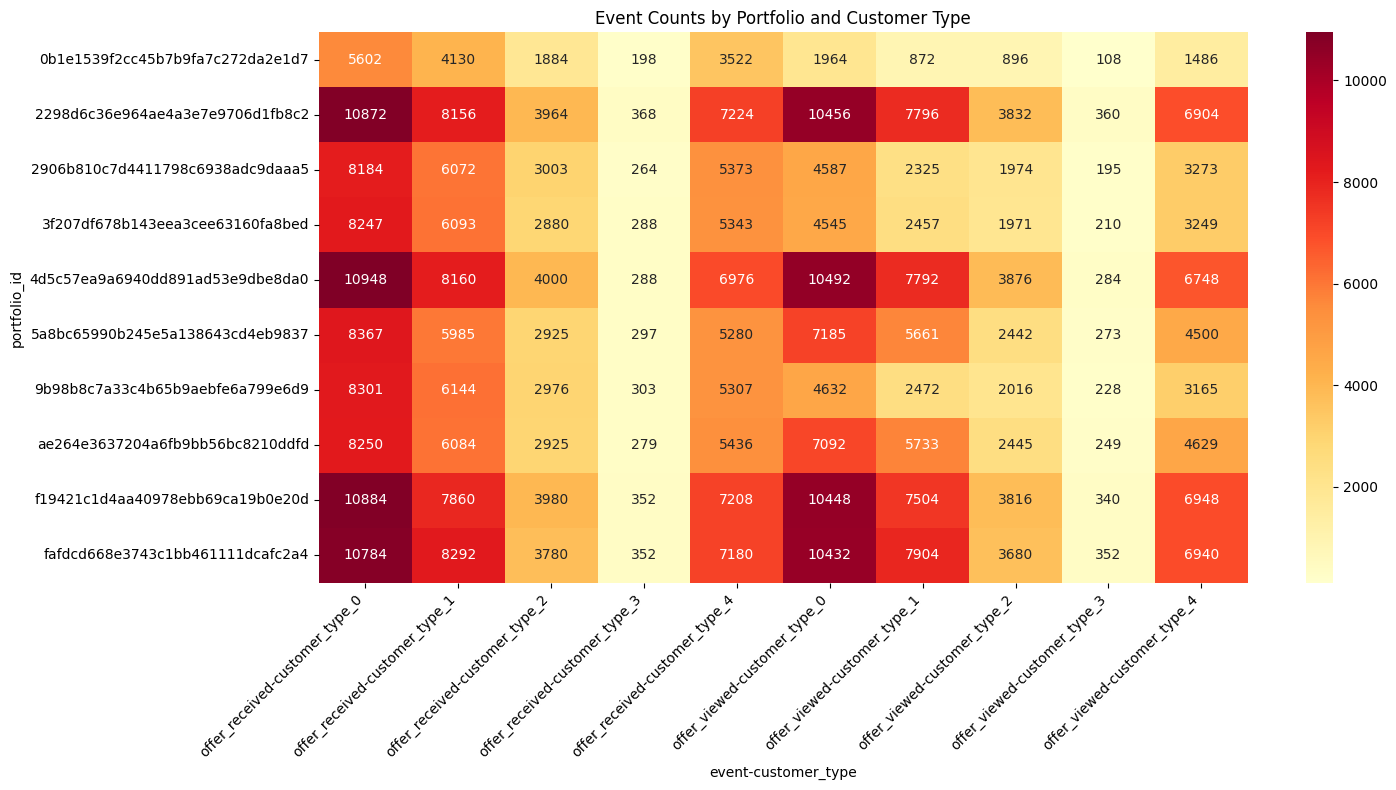


Summary Statistics:

Mean counts by event type:
event
offer_received    5031.40
offer_viewed      3994.76
Name: count, dtype: float64

Total counts by customer type:
customer_type
customer_type_0    162272
customer_type_1    117492
customer_type_2     59265
customer_type_3      5588
customer_type_4    106691
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

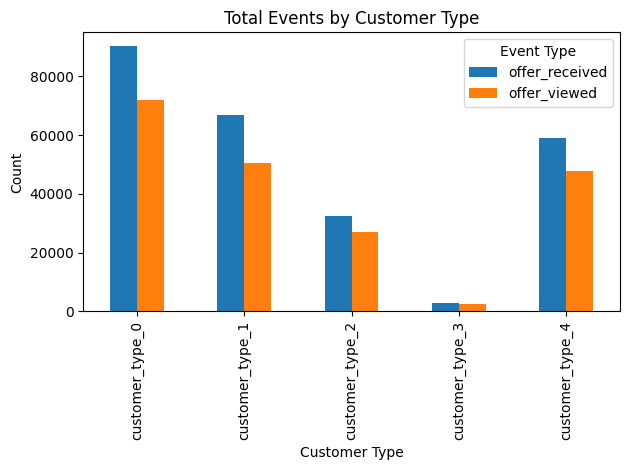

In [39]:
# Reshape the data for better visualization
pivot_table = analysis_portfolio.pivot_table(
    index='portfolio_id', 
    columns=['event', 'customer_type'], 
    values='count',
    fill_value=0
)

# Plot heatmap of events across portfolios and customer types
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Event Counts by Portfolio and Customer Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate summary statistics
print("\nSummary Statistics:")
print("\nMean counts by event type:")
print(analysis_portfolio.groupby('event')['count'].mean())

print("\nTotal counts by customer type:")
print(analysis_portfolio.groupby('customer_type')['count'].sum())

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
analysis_portfolio.pivot_table(
    index='customer_type',
    columns='event',
    values='count',
    aggfunc='sum'
).plot(kind='bar')
plt.title('Total Events by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()

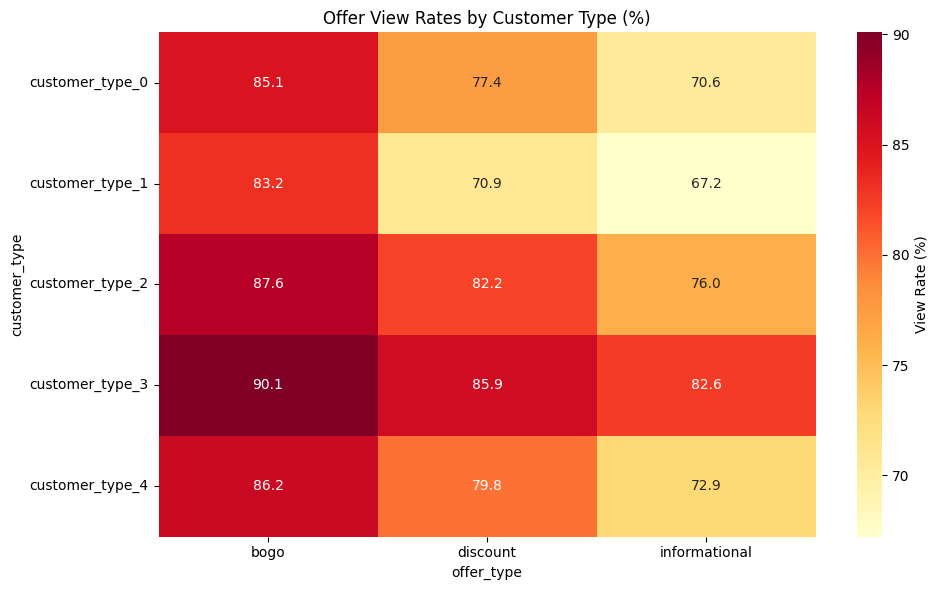


Preferred offer type by customer segment:
bogo: customer_type_3 (View rate: 90.1%)
discount: customer_type_3 (View rate: 85.9%)
informational: customer_type_3 (View rate: 82.6%)


In [40]:
# Calculate offer view rates by customer type and offer type
offer_analysis = analysis[analysis['offer_type'].notna()].copy()
total_received = offer_analysis[offer_analysis['event'] == 'offer_received'].groupby(['customer_type', 'offer_type']).size().reset_index(name='received')
total_viewed = offer_analysis[offer_analysis['event'] == 'offer_viewed'].groupby(['customer_type', 'offer_type']).size().reset_index(name='viewed')

# Merge received and viewed counts
offer_preference = pd.merge(total_received, total_viewed, on=['customer_type', 'offer_type'])
offer_preference['view_rate'] = offer_preference['viewed'] / offer_preference['received'] * 100

# Create a heatmap
plt.figure(figsize=(10, 6))
pivot = offer_preference.pivot(index='customer_type', columns='offer_type', values='view_rate')
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'View Rate (%)'})
plt.title('Offer View Rates by Customer Type (%)')
plt.tight_layout()
plt.show()

# Print the customer type with highest view rate for each offer type
print("\nPreferred offer type by customer segment:")
for offer in offer_preference['offer_type'].unique():
    best_segment = offer_preference[offer_preference['offer_type'] == offer].nlargest(1, 'view_rate')
    print(f"{offer}: {best_segment['customer_type'].values[0]} (View rate: {best_segment['view_rate'].values[0]:.1f}%)")

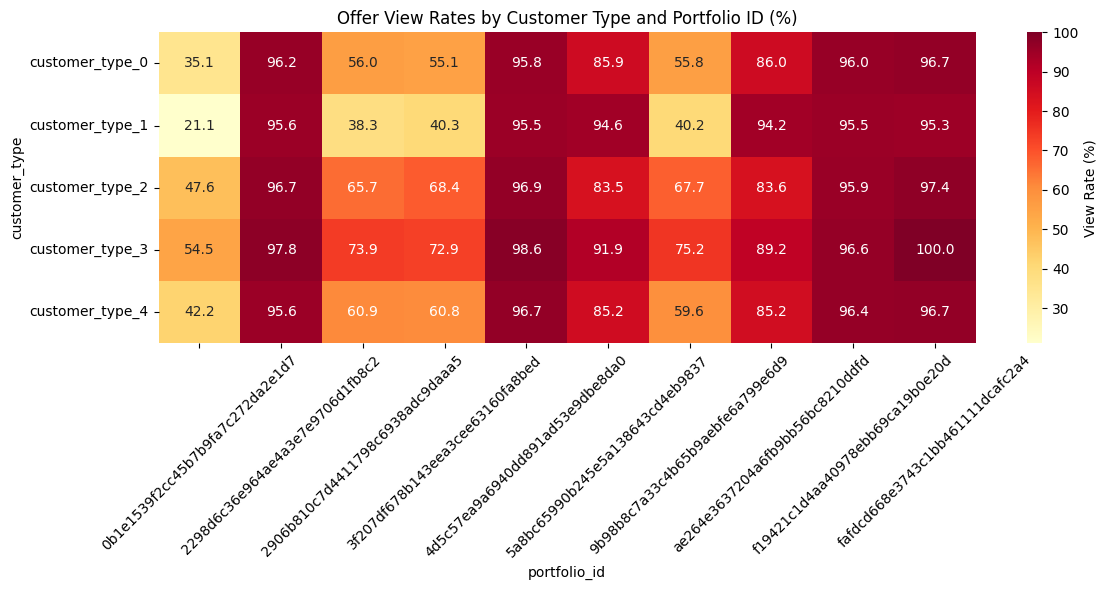


Preferred portfolio by customer segment:
0b1e1539f2cc45b7b9fa7c272da2e1d7: customer_type_3 (View rate: 54.5%)
2298d6c36e964ae4a3e7e9706d1fb8c2: customer_type_3 (View rate: 97.8%)
2906b810c7d4411798c6938adc9daaa5: customer_type_3 (View rate: 73.9%)
3f207df678b143eea3cee63160fa8bed: customer_type_3 (View rate: 72.9%)
4d5c57ea9a6940dd891ad53e9dbe8da0: customer_type_3 (View rate: 98.6%)
5a8bc65990b245e5a138643cd4eb9837: customer_type_1 (View rate: 94.6%)
9b98b8c7a33c4b65b9aebfe6a799e6d9: customer_type_3 (View rate: 75.2%)
ae264e3637204a6fb9bb56bc8210ddfd: customer_type_1 (View rate: 94.2%)
f19421c1d4aa40978ebb69ca19b0e20d: customer_type_3 (View rate: 96.6%)
fafdcd668e3743c1bb461111dcafc2a4: customer_type_3 (View rate: 100.0%)


In [41]:
# Calculate view rates by customer type and portfolio_id
total_received = analysis[analysis['portfolio_id'].notna()].groupby(['customer_type', 'portfolio_id'])['event'].apply(lambda x: (x == 'offer_received').sum()).reset_index(name='received')
total_viewed = analysis[analysis['portfolio_id'].notna()].groupby(['customer_type', 'portfolio_id'])['event'].apply(lambda x: (x == 'offer_viewed').sum()).reset_index(name='viewed')

# Merge received and viewed counts
portfolio_preference = pd.merge(total_received, total_viewed, on=['customer_type', 'portfolio_id'])
portfolio_preference['view_rate'] = portfolio_preference['viewed'] / portfolio_preference['received'] * 100

# Create a heatmap
plt.figure(figsize=(12, 6))
pivot = portfolio_preference.pivot(index='customer_type', columns='portfolio_id', values='view_rate')
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'View Rate (%)'})
plt.title('Offer View Rates by Customer Type and Portfolio ID (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the customer type with highest view rate for each portfolio
print("\nPreferred portfolio by customer segment:")
for portfolio in portfolio_preference['portfolio_id'].unique():
    best_segment = portfolio_preference[portfolio_preference['portfolio_id'] == portfolio].nlargest(1, 'view_rate')
    print(f"{portfolio}: {best_segment['customer_type'].values[0]} (View rate: {best_segment['view_rate'].values[0]:.1f}%)")

In [42]:
portfolio = pd.read_json('../data/raw/portfolio.json', orient='records', lines=True)
portfolio


,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [43]:
# First rename the 'id' column in portfolio to match the analysis
portfolio = portfolio.rename(columns={'id': 'portfolio_id'})

# Calculate the rating (view rate) for each customer type and portfolio
ratings = portfolio_preference.pivot(
    index='portfolio_id',
    columns='customer_type',
    values='view_rate'
).reset_index()

# Merge the portfolio with the ratings
portfolio_analysis = pd.merge(
    portfolio,
    ratings,
    on='portfolio_id',
    how='left'
)

# Display the result
print("Portfolio with customer type ratings:")
portfolio_analysis

Portfolio with customer type ratings:


,reward,channels,difficulty,duration,offer_type,portfolio_id,customer_type_0,customer_type_1,customer_type_2,customer_type_3,customer_type_4
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,85.963636,94.230769,83.589744,89.247312,85.154525
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,95.834856,95.490196,96.900000,98.611111,96.731651
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,55.110949,40.324963,68.437500,72.916667,60.808535
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,55.800506,40.234375,67.741935,75.247525,59.638214
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,35.058908,21.113801,47.558386,54.545455,42.191936
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,96.173657,95.586072,96.670030,97.826087,95.570321
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,96.735905,95.320791,97.354497,100.000000,96.657382
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,85.873073,94.586466,83.487179,91.919192,85.227273
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,95.994120,95.470738,95.879397,96.590909,96.392897
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5,56.048387,38.290514,65.734266,73.863636,60.915690


In [44]:
# Create figure and axis with larger size for better readability
fig, ax = plt.subplots(figsize=(12, 8))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# Create table
table = ax.table(cellText=portfolio_analysis.values,
                colLabels=portfolio_analysis.columns,
                cellLoc='center',
                loc='center',
                colColours=['#f2f2f2']*len(portfolio_analysis.columns))

# Auto-adjust cell sizes
table.auto_set_font_size(False)
table.set_fontsize(9)
table.auto_set_column_width(col=list(range(len(portfolio_analysis.columns))))

# Tight layout to ensure the table fits
plt.tight_layout()

# Save the figure
plt.savefig('portfolio_analysis_table.png', 
            bbox_inches='tight',
            dpi=300,
            format='png')

plt.close()